In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("C:\\Users\\INDIA\\Downloads\\weather_classification_data.csv")
data

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy  
         Temperature

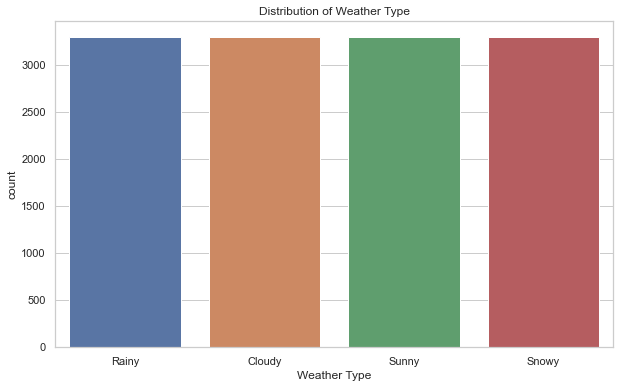

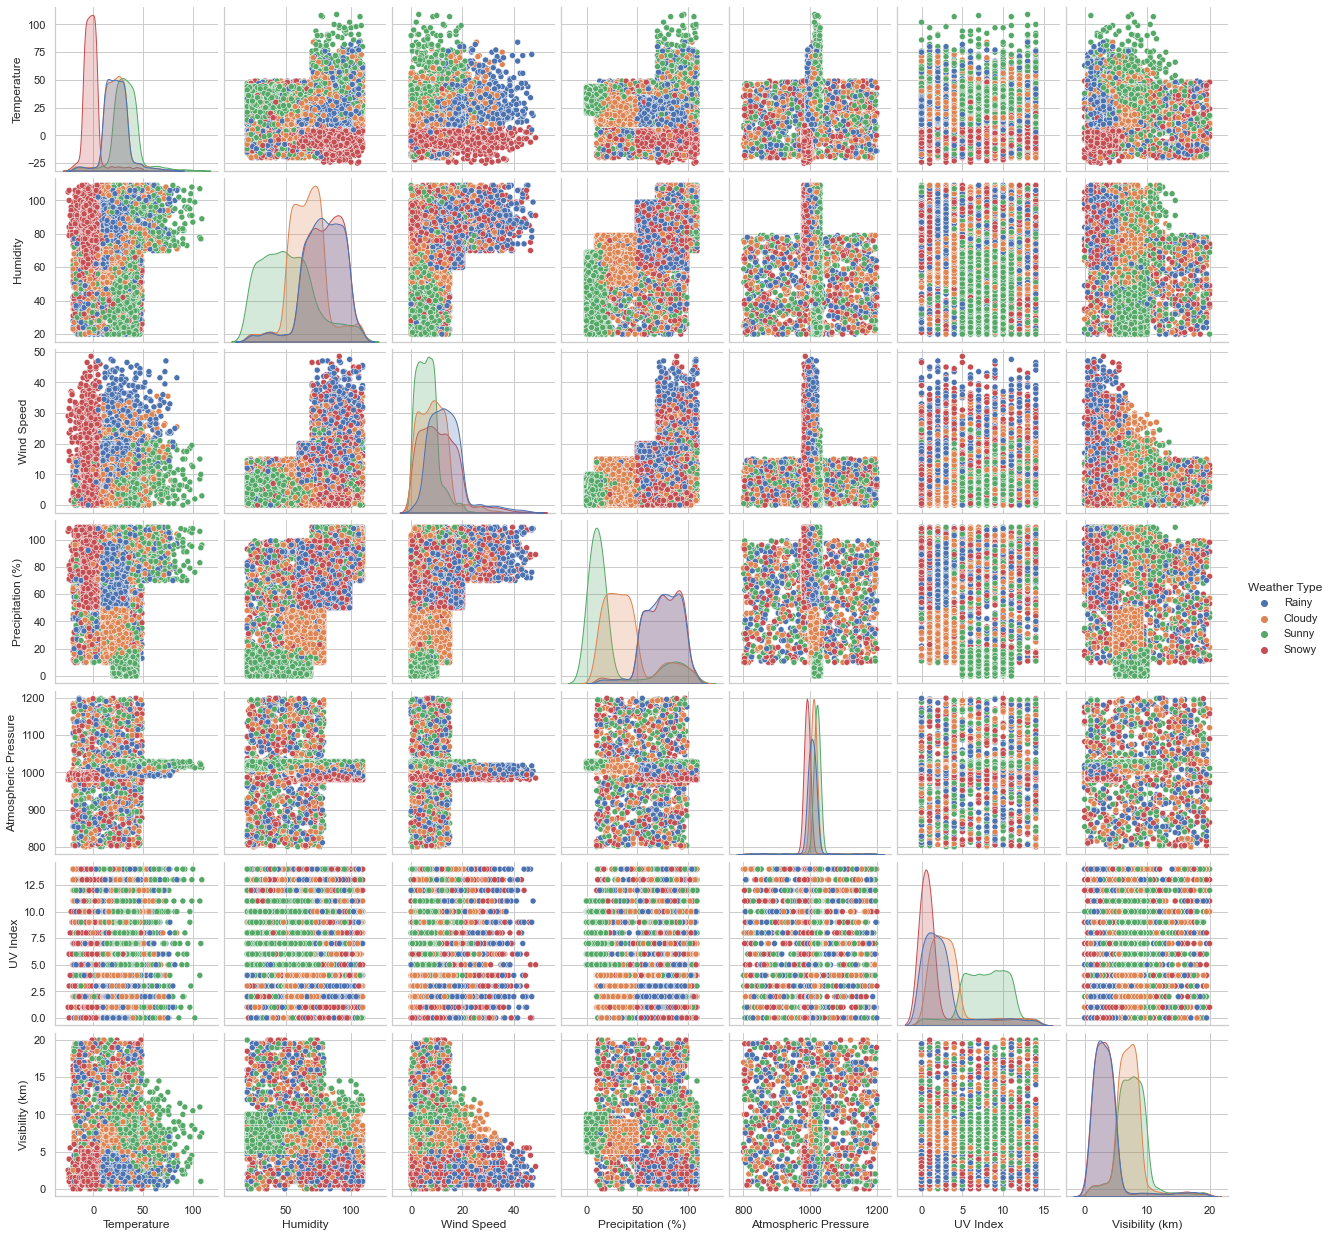

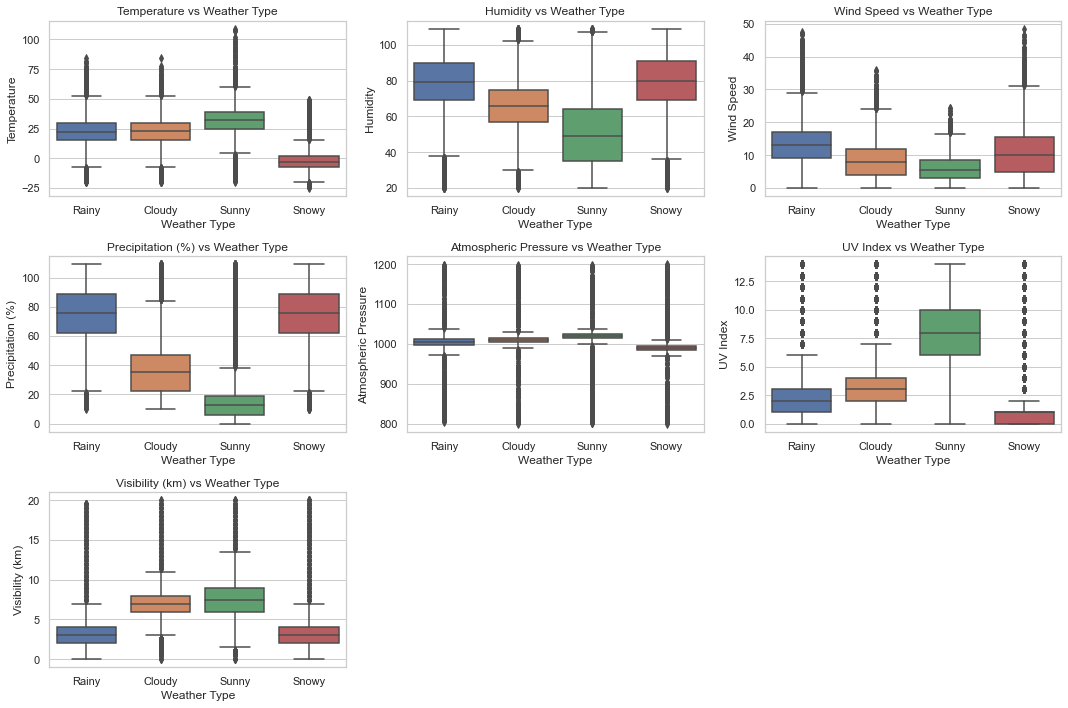

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
csv_path = 'C:\\Users\\INDIA\\Downloads\\weather_classification_data.csv'
weather_data = pd.read_csv(csv_path)

# Display the first few rows
print(weather_data.head())

# Summary statistics
print(weather_data.describe(include='all'))

# Check for missing values
print(weather_data.isnull().sum())

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Distribution of Weather Type
plt.figure(figsize=(10, 6))
sns.countplot(data=weather_data, x='Weather Type')
plt.title('Distribution of Weather Type')
plt.show()

# Pair plot to visualize relationships between numerical features and the target variable
sns.pairplot(weather_data, hue='Weather Type', diag_kind='kde')
plt.show()

# Box plots to show the distribution of numerical features for each 'Weather Type'
plt.figure(figsize=(15, 10))
for i, feature in enumerate(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=weather_data, x='Weather Type', y=feature)
    plt.title(f'{feature} vs Weather Type')
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the CSV file
csv_path = 'C:\\Users\\INDIA\\Downloads\\weather_classification_data.csv'
weather_data = pd.read_csv(csv_path)

# Separate features and target variable
X = weather_data.drop('Weather Type', axis=1)
y = weather_data['Weather Type']

# Identify categorical features
categorical_features = ['Cloud Cover', 'Season', 'Location']
numerical_features = [col for col in X.columns if col not in categorical_features]

# Preprocessing for numerical data: standardize
numerical_transformer = StandardScaler()

# Preprocessing for categorical data: one-hot encode
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing and model pipeline
def create_pipeline(model):
    return Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# List of models to evaluate
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5))  # Adding KNN to the list
]

# Train and evaluate each model
results = {}
for name, model in models:
    pipeline = create_pipeline(model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {'accuracy': accuracy, 'report': report}
    print(f'{name}:\nAccuracy: {accuracy}\n')

# Print detailed classification reports
for name, result in results.items():
    print(f'{name} Classification Report:')
    print(pd.DataFrame(result['report']).transpose())
    print('\n')


Logistic Regression:
Accuracy: 0.8712121212121212

Decision Tree:
Accuracy: 0.9083333333333333

Random Forest:
Accuracy: 0.9147727272727273

Support Vector Machine:
Accuracy: 0.9071969696969697

K-Nearest Neighbors:
Accuracy: 0.8965909090909091

Logistic Regression Classification Report:
              precision    recall  f1-score      support
Cloudy         0.823088  0.843318  0.833080   651.000000
Rainy          0.857820  0.839258  0.848437   647.000000
Snowy          0.885753  0.940086  0.912111   701.000000
Sunny          0.921141  0.856474  0.887631   641.000000
accuracy       0.871212  0.871212  0.871212     0.871212
macro avg      0.871950  0.869784  0.870315  2640.000000
weighted avg   0.872047  0.871212  0.871074  2640.000000


Decision Tree Classification Report:
              precision    recall  f1-score      support
Cloudy         0.886503  0.887865  0.887183   651.000000
Rainy          0.909810  0.888717  0.899140   647.000000
Snowy          0.923505  0.947218  0.935211  

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import tkinter as tk
from tkinter import messagebox

# Load the CSV file
file_path = "C:\\Users\\INDIA\\Downloads\\weather_classification_data.csv"
weather_data = pd.read_csv(file_path)

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Cloud Cover', 'Season', 'Location', 'Weather Type']

for column in categorical_columns:
    le = LabelEncoder()
    weather_data[column] = le.fit_transform(weather_data[column])
    label_encoders[column] = le

# Separate features and target variable
X = weather_data.drop('Weather Type', axis=1)
y = weather_data['Weather Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Function to make a prediction
def predict_weather():
    try:
        temp = float(entry_temp.get())
        humidity = float(entry_humidity.get())
        wind_speed = float(entry_wind_speed.get())
        precipitation = float(entry_precipitation.get())
        cloud_cover = label_encoders['Cloud Cover'].transform([entry_cloud_cover.get()])[0]
        pressure = float(entry_pressure.get())
        uv_index = float(entry_uv_index.get())
        season = label_encoders['Season'].transform([entry_season.get()])[0]
        visibility = float(entry_visibility.get())
        location = label_encoders['Location'].transform([entry_location.get()])[0]

        features = [[temp, humidity, wind_speed, precipitation, cloud_cover, pressure, uv_index, season, visibility, location]]
        prediction = rf_model.predict(features)
        predicted_weather = label_encoders['Weather Type'].inverse_transform(prediction)[0]

        messagebox.showinfo("Prediction", f"The predicted weather type is: {predicted_weather}")
    except Exception as e:
        messagebox.showerror("Error", str(e))

# Create the main window
window = tk.Tk()
window.title("Weather Prediction")

# Create input fields and labels
tk.Label(window, text="Temperature").grid(row=0, column=0)
entry_temp = tk.Entry(window)
entry_temp.grid(row=0, column=1)

tk.Label(window, text="Humidity").grid(row=1, column=0)
entry_humidity = tk.Entry(window)
entry_humidity.grid(row=1, column=1)

tk.Label(window, text="Wind Speed").grid(row=2, column=0)
entry_wind_speed = tk.Entry(window)
entry_wind_speed.grid(row=2, column=1)

tk.Label(window, text="Precipitation (%)").grid(row=3, column=0)
entry_precipitation = tk.Entry(window)
entry_precipitation.grid(row=3, column=1)

tk.Label(window, text="Cloud Cover").grid(row=4, column=0)
entry_cloud_cover = tk.Entry(window)
entry_cloud_cover.grid(row=4, column=1)

tk.Label(window, text="Atmospheric Pressure").grid(row=5, column=0)
entry_pressure = tk.Entry(window)
entry_pressure.grid(row=5, column=1)

tk.Label(window, text="UV Index").grid(row=6, column=0)
entry_uv_index = tk.Entry(window)
entry_uv_index.grid(row=6, column=1)

tk.Label(window, text="Season").grid(row=7, column=0)
entry_season = tk.Entry(window)
entry_season.grid(row=7, column=1)

tk.Label(window, text="Visibility (km)").grid(row=8, column=0)
entry_visibility = tk.Entry(window)
entry_visibility.grid(row=8, column=1)

tk.Label(window, text="Location").grid(row=9, column=0)
entry_location = tk.Entry(window)
entry_location.grid(row=9, column=1)

# Create the predict button
predict_button = tk.Button(window, text="Predict Weather", command=predict_weather)
predict_button.grid(row=10, columnspan=2)

# Run the application
window.mainloop()


C:\Users\INDIA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
